Lab 3

Exercise 1

In [7]:
# Задание №1: Подготовка тестовых данных и ручной расчёт

# Входные данные из лабораторной работы
arrivals = [0.12, 1.291, 6.594, 6.821, 9.031, 14.971, 17.15]   # моменты прихода
services = [0.634, 2.31, 6.78, 0.477, 5.104, 0.459, 1.442]     # длительности обслуживания
T_model = 17.15                                                 # время моделирования

# Оставляем только те заявки, которые поступили до окончания моделирования
valid_indices = [i for i, t in enumerate(arrivals) if t <= T_model]
arrivals = [arrivals[i] for i in valid_indices]
services = [services[i] for i in valid_indices]

# Имитация работы системы (без случайностей)
processed = 0
rejected = 0
work_time = 0.0
idle_time_between = 0.0
last_end = 0.0

i = 0
while i < len(arrivals):
    t = arrivals[i]
    if t >= last_end:           # прибор свободен
        finish = t + services[i]
        work_time += services[i]
        processed += 1
        if last_end > 0:
            idle_time_between += (t - last_end)
        last_end = finish
    else:                        # прибор занят (отказ)
        rejected += 1
    i += 1

# Расчёт характеристик
total_arrivals = len(arrivals)
prob_processed = processed / total_arrivals if total_arrivals > 0 else 0
load = work_time / T_model
idle_prob = idle_time_between / T_model

# Вывод результатов (сравните с ручными вычислениями в лабораторной работе)
print("=== Задание №1. Тестовый расчёт ===")
print(f"Число обработанных программ: {processed}")
print(f"Число отказов: {rejected}")
print(f"Общее число поступивших программ: {total_arrivals}")
print(f"Вероятность обработки: {prob_processed:.3f}")
print(f"Время работы процессора: {work_time:.3f} с")
print(f"Время простоя (между обслуживаниями): {idle_time_between:.3f} с")
print(f"Общее время моделирования: {T_model:.2f} с")
print(f"Загрузка процессора: {load:.3f}")
print(f"Вероятность простоя: {idle_prob:.3f}")

=== Задание №1. Тестовый расчёт ===
Число обработанных программ: 5
Число отказов: 2
Общее число поступивших программ: 7
Вероятность обработки: 0.714
Время работы процессора: 11.625 с
Время простоя (между обслуживаниями): 6.847 с
Общее время моделирования: 17.15 с
Загрузка процессора: 0.678
Вероятность простоя: 0.399


Exercise 2

In [ ]:
import numpy as np

def simulate_single_channel(lam, mu, T, arrival_times=None, service_times=None):
    """
    Имитационное моделирование одноканальной системы с отказами.
    
    Параметры:
        lam : float - интенсивность входного потока (1/с)
        mu  : float - интенсивность обслуживания (1/с)
        T   : float - время моделирования
        arrival_times : list, optional - фиксированные моменты прихода
        service_times : list, optional - фиксированные длительности обслуживания
    
    Возвращает словарь с характеристиками:
        processed - число обработанных программ
        rejected - число отказов
        total_arrivals - общее число поступивших программ
        prob_processed - относительная пропускная способность
        work_time - суммарное время работы процессора
        idle_time_between - суммарное время простоя между обслуживаниями
        total_time - общее время моделирования
        load - загрузка процессора (work_time / total_time)
        idle_prob - вероятность простоя (idle_time_between / total_time)
    """
    if arrival_times is not None and service_times is not None:
        # Используем фиксированные входные данные
        arrivals = np.array(arrival_times)
        services = np.array(service_times)
        # Оставляем только заявки, пришедшие до окончания моделирования
        mask = arrivals <= T
        arrivals = arrivals[mask]
        services = services[mask]
    else:
        # Генерация случайных потоков
        # Интервалы между заявками (экспоненциальное распределение)

        #u = np.random.rand()
        #dt = - (1/λ1) * np.log(u) 

#NEED TO FIX THIS AREA AND USE THE CORRECT FORMULA FOR EXPONENTIAL

        interarrivals = np.random.exponential(scale=1/lam, size=int(lam * T * 2))
        arrivals = np.cumsum(interarrivals)
        arrivals = arrivals[arrivals <= T]          # только до момента T
        # Длительности обслуживания для каждой заявки
        services = np.random.exponential(scale=1/mu, size=len(arrivals))
    
    n = len(arrivals)
    processed = 0
    rejected = 0
    work = 0.0
    idle_between = 0.0
    last_end = 0.0          # время окончания последнего обслуживания
    
    i = 0
    while i < n:
        t = arrivals[i]
        if t >= last_end:   # прибор свободен
            # Начинаем обслуживание
            service_time = services[i]
            finish = t + service_time
            work += service_time
            processed += 1
            # Учитываем время простоя с момента окончания предыдущего обслуживания
            if last_end > 0:
                idle_between += (t - last_end)
            last_end = finish
            i += 1
        else:                # прибор занят – отказ
            rejected += 1
            i += 1
            # last_end не меняется, простой продолжается
    
    total_time = T
    prob_processed = processed / n if n > 0 else 0
    load = work / total_time
    idle_prob = idle_between / total_time   # по определению из лабораторной
    
    return {
        'processed': processed,
        'rejected': rejected,
        'total_arrivals': n,
        'prob_processed': prob_processed,
        'work_time': work,
        'idle_time_between': idle_between,
        'total_time': total_time,
        'load': load,
        'idle_prob': idle_prob
    }

Exercise 3

In [9]:
# Тестовые данные из ручного расчёта (задание №1)
arrivals_manual = [0.12, 1.291, 6.594, 6.821, 9.031, 14.971]
# Длительности обслуживания для каждой заявки в порядке поступления.
# Для отклонённых заявок значения не влияют на результат,
# поэтому оставляем исходные числа из условия.
services_manual = [0.634, 2.31, 6.78, 5.104, 0.459, 0.477]
T_manual = 17.15

# Запуск моделирования с фиксированными списками
results = simulate_single_channel(lam=None, mu=None, T=T_manual,
                                  arrival_times=arrivals_manual,
                                  service_times=services_manual)

# Вывод результатов и сравнение с ожидаемыми
print("=== Задание №3. Сопоставление с ручным расчётом ===")
print(f"Число обработанных программ: {results['processed']} (ожидалось 4)")
print(f"Число отказов: {results['rejected']} (ожидалось 2)")
print(f"Общее число поступивших программ: {results['total_arrivals']} (ожидалось 6)")
print(f"Вероятность обработки: {results['prob_processed']:.3f} (ожидалось 0.667)")
print(f"Время работы процессора: {results['work_time']:.3f} (ожидалось 10.201)")
print(f"Время простоя (между обслуживаниями): {results['idle_time_between']:.3f} (ожидалось 5.127)")
print(f"Общее время моделирования: {results['total_time']:.2f} (ожидалось 17.15)")
print(f"Загрузка процессора: {results['load']:.3f} (ожидалось 0.595)")
print(f"Вероятность простоя: {results['idle_prob']:.3f} (ожидалось 0.299)")

=== Задание №3. Сопоставление с ручным расчётом ===
Число обработанных программ: 4 (ожидалось 4)
Число отказов: 2 (ожидалось 2)
Общее число поступивших программ: 6 (ожидалось 6)
Вероятность обработки: 0.667 (ожидалось 0.667)
Время работы процессора: 10.201 (ожидалось 10.201)
Время простоя (между обслуживаниями): 5.127 (ожидалось 5.127)
Общее время моделирования: 17.15 (ожидалось 17.15)
Загрузка процессора: 0.595 (ожидалось 0.595)
Вероятность простоя: 0.299 (ожидалось 0.299)


Exercise 4


=== Задание №4. Сравнение с ТМО ===
   ρ    |  P_obr (sim) | P_obr (anal) |  P_load (sim) | P_load (anal)
--------|--------------|--------------|---------------|--------------
  0.10 |       1.0000 |       0.9091 |        0.0000 |       0.0909
  0.62 |       1.0000 |       0.6169 |        0.0000 |       0.3831
  1.14 |       1.0000 |       0.4668 |        0.0000 |       0.5332
  1.66 |       1.0000 |       0.3755 |        0.0000 |       0.6245
  2.18 |       1.0000 |       0.3140 |        0.0000 |       0.6860
  2.71 |       1.0000 |       0.2699 |        0.0000 |       0.7301
  3.23 |       1.0000 |       0.2366 |        0.0000 |       0.7634
  3.75 |       1.0000 |       0.2106 |        0.0000 |       0.7894
  4.27 |       1.0000 |       0.1898 |        0.0000 |       0.8102
  4.79 |       1.0000 |       0.1727 |        0.0000 |       0.8273
  5.31 |       1.0000 |       0.1585 |        0.0000 |       0.8415
  5.83 |       1.0000 |       0.1464 |        0.0000 |       0.8536
  6.35 

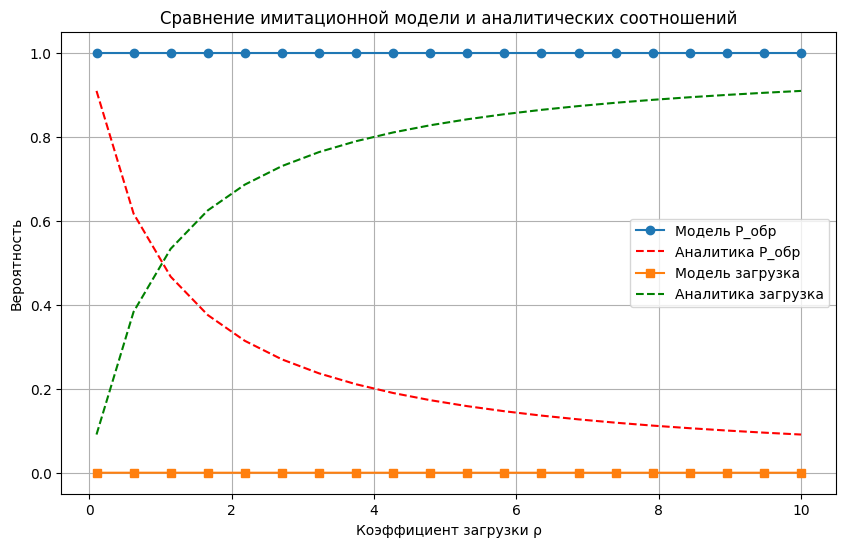

In [10]:
import matplotlib.pyplot as plt

# Аналитические зависимости для M/M/1/1
def pobr_analytical(rho):
    return 1 / (1 + rho)

def ps_analytical(rho):
    return rho / (1 + rho)

# Параметры эксперимента
mu = 1.0                     # фиксируем интенсивность обслуживания
T_sim = 100000               # большое время для стационарного режима
rho_values = np.linspace(0.1, 10, 20)   # диапазон коэффициента загрузки

sim_pobr = []
sim_ps = []

for rho in rho_values:
    lam = rho * mu
    res = simulate_single_channel(lam, mu, T_sim)
    sim_pobr.append(res['prob_processed'])
    sim_ps.append(res['load'])

# Аналитические значения
anal_pobr = [pobr_analytical(r) for r in rho_values]
anal_ps = [ps_analytical(r) for r in rho_values]

# Вывод таблицы
print("\n=== Задание №4. Сравнение с ТМО ===")
print("   ρ    |  P_obr (sim) | P_obr (anal) |  P_load (sim) | P_load (anal)")
print("--------|--------------|--------------|---------------|--------------")
for i, r in enumerate(rho_values):
    print(f"{r:6.2f} | {sim_pobr[i]:12.4f} | {anal_pobr[i]:12.4f} | {sim_ps[i]:13.4f} | {anal_ps[i]:12.4f}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(rho_values, sim_pobr, 'o-', label='Модель P_обр')
plt.plot(rho_values, anal_pobr, 'r--', label='Аналитика P_обр')
plt.plot(rho_values, sim_ps, 's-', label='Модель загрузка')
plt.plot(rho_values, anal_ps, 'g--', label='Аналитика загрузка')
plt.xlabel('Коэффициент загрузки ρ')
plt.ylabel('Вероятность')
plt.title('Сравнение имитационной модели и аналитических соотношений')
plt.legend()
plt.grid(True)
plt.show()